<a href="https://colab.research.google.com/github/simranmallik/Math210/blob/main/Simran_Mallik_Lab_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1.3

Goals:
* Compute arithmetic expressions.
* Define and use functions.
* Graph functions.
* Implement Newton's method.
* Determine which properties of a function affect the speed of Newton's method.

### Instructions
* With your group, work through each of the questions below.  Most questions include some discussion and some bullet-pointed instructions.  Make sure you carry out the bullet-pointed instructions, because that it what is graded.  
* You are expected to collaborate with your group.  You should arrive at the answers to these questions together.  However, your submitted answers should be expressed in your own words.
* If you need to pause, you can save and come back to your work later.  
* When you are done, select "download .ipynb" from the file menu.  Save the ipynb to your computer, then upload it to the Lab assignment in gradescope.


We will begin by importing the libraries we use for graphing.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Define five algebraic functions by running this cell.  Each person in your group should pick a different one of these functions.  For the rest of the lab, "your function" refers to the function you picked. 

In [ ]:
# Ryan
def f1(x):
  return x**3 - 4*x**2 + 6*x - 2.5
# tries: 8, distance: .60

# Afshin
def f2(x):
  return x**3 - 6*x**2 + 14*x - 10.5
# tries: 5, distance: .12

# Abbey
def f3(x):
  return x**3 - 10*x**2 + 30*x - 26.5
# tries: 7, distance: .35

def f4(x):
  return x**3 - 5*x**2 + 10*x - 6.5

# Simran
def f5(x):
  return x**3 - 8*x**2 + 22*x - 18.5
# tries: 7, distance: .28

Your function has a root (x-intercept) near $x=2$, but it would be difficult to compute exactly.  Here's an idea.  We can make the linearization $L(x)$ of your function at $a=2$, and solve for the point where $L(x)=0$.  It won't be exactly the root of your function, but it should be a closer guess than $2$.

### Q1

* In a code cell below this, define a function `l(x)` which is the linearization of your function at $a=2$.  You can compute the derivative and value you need by hand, with a calculator, or in a code cell.
* Create a graph using $x$ values near $2$ that contains your function and its linearization.  
* Use algebra to solve for where $L(x)=0$ on your own paper. State your solution and check that it matches the intercept your graph shows you.

You graph two functions on one graph by calling `plt.plot()` twice before you call `plt.show()`.  You can restrict the height of the graph so that you can see the details better by calling `plt.ylim((-5,5))` before you call `plt.show()`.

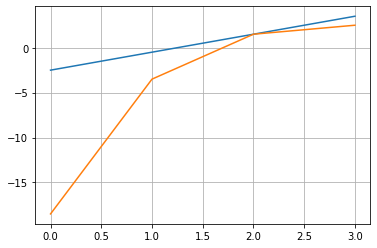

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

a = np.arange(0,4,1)
def l(a):
  return 2*a - 2.5

def o(a):
  return a**3 - 8*(a**2) + 22*a - 18.5

plt.plot(a, l(a))
plt.plot(a, o(a))
# plt.ylim((-5,5))
plt.grid()
plt.show()


### Q2

The first idea of Newton's method is that the $x$-intercept of the linearization at $a$ is usually a better approximation of the root than $a$ is.  
* On paper, write the linearization of your function at a general point $a$ and solve $L(x)=0$ for $x$.  
* In a cell below define a function `new(a)` which returns the value of `x` you solved above for an input `a`.
* Test your definition by inputting `new(2)`.  This should give the answer you got from Q1.

In [1]:
# linearization = tangent line
# x = (negative of original function / derivative of original function) + a
def new(a):
  x = (((-a)**3 + (8*(a**2)) - (22*a) + 18.5)/(3*(a**2) - (16*a) + 22)) + a
  return x

new(2)


1.25

### Q3

If we can use the linearization at `a` to produce a better approximation, then we can use the linearization at that point to produce an even better approximation.  Then we can use the linearization at that point to produce an even better approximation, and so on and so on.  This is the second idea of Newton's method.  
* Add a line to your definition of `new(a)` that prints the value of `x` before it returns `x`.  
* Apply your function 10 times to the intial guess $a=2$: `new(new(new(new(new(new(new(new(new(new(2))))))))))` 

You should notice that the last few approximations are remarkably close together.  That's because the approximations are so accurate that is they cannot be improved upon much.

In [ ]:
def new(a):
  x = (((-a)**3 + (8*(a**2)) - (22*a) + 18.5)/(3*(a**2) - (16*a) + 22)) + a
  print(x)
  return x

new(new(new(new(new(new(new(new(new(new(2))))))))))

1.25
1.4813084112149533
1.5253516863509085
1.5268409691718012
1.5268426322797213
1.5268426322817934
1.5268426322817925
1.5268426322817925
1.5268426322817925
1.5268426322817925


1.5268426322817925

###Q4

We should assume that the final outcome of applying the `new` function 10 times is close enough to the actual root of your function.  Now the question is, how quickly did Newton's method get you close to that actual root?  To answer this you'll want to know the error in each approximation.

* Assign the actual value of the root of your function near 2 to a variable
* Modify your `new` function to instead print the difference between `x` and that actual value.
* Apply the `new` function 10 times again to the intial guess $a=2$.  What do you notice?

It may help you make sense of what you saw to know that python encodes small numbers in scientific notation.  Furthermore, numbers in python are by default only stored to 32 decimal places.


In [2]:
root = 1.5268426322817925

def new(a):
  x = (((-a)**3 + (8*(a**2)) - (22*a) + 18.5)/(3*(a**2) - (16*a) + 22)) + a
  print(root - x)
  return x

new(new(new(new(new(new(new(new(new(new(2))))))))))

# .27 away from actual root, ___ away from actual root .... 

0.2768426322817925
0.04553422106683924
0.0014909459308840578
1.6631099912789438e-06
2.071232074740692e-12
-8.881784197001252e-16
0.0
0.0
0.0
0.0


1.5268426322817925

###Q5

This is our main question:  

> What properties of a function make Newton's method more or less efficient at finding a root?

The method worked for everyone's function eventually, but some coverged more quickly than others.  They got closer to the actual value in fewer steps.  The purpose of this question is to systematically generate and compare data and to try to draw conclusions from that data.  Confer with your group and agree on an apporach to the following questions.  Report your decisions and findings in a combination of text and code cells.

* How are you going to measure how quickly the method is converging?
* Is everyone's root the same distance from their starting guess?  In order to get comparable data how can you control for the discrepancies here?
* Generate and share the data about your respective functions.  Explain how quickly each person's function converges according the the measure you chose.
* Make a conjecture about what underlying property of the functions or their graphs caused some to converge faster than others.  
* For full credit, propose a reasonable mathematical explanation for why this property would have that effect.



In [ ]:
# 1. How are you going to measure how quickly the method is converging? 
  # For each person, we would measure the number of times it took before the method converged to 0, and compare the number of times. 
  # On the seventh time, the method converged to 0 for me, which was different from the number of times it took for my 
  # groupmates' methods to converge to 0. 

# 2. Is everyone's root the same distance from their starting guess? In order to get comparable data how can you control for the discrepancies here?
  # Not everyone's root is the same distance from their starting guess. To get comparable data, you take the difference between
  # the starting distance and root and compare those distances and also compare the number of times it took to get to that final distance. 

# 3. Generate and share the data about your respective functions. Explain how quickly each person's function converges according to the measure you chose.
  # We could not find an exact trend in our data, however, the person with the equation that resulted in the most tries, 8 tries, to get to 0
  # in our group also displayed the greatest distance between the initial guess and the root, which was .60. We believe that generally, the fewer the number of
  # tries it took to get to 0, the smaller the distance between the initial guess and the root would be. For example, one person's equation
  # resulted in 5 tries to get to 0 with a distance of 0.12. We think that it's possible that the smaller the distance is between the root and the starting guess, the faster the method gets to 0. 
  
# 4. Make a conjecture about what underlying property of the functions or their graphs caused some to converge faster than others.
  # The constant in each equation could be affecting the rate of convergence. For example, my equation had a constant of -18.5 with
  # a distance of .28, and Abbbey's equation had a constant of - 26.5 with a distance of .35. These constants and distances are more 
  # similar than the constants and distances of the other equations in the group. This may indicate that there may be a "sweet spot" 
  # in terms of the constants helping to determine the rate of convergence. 

# 5. Based off of our research, we found that if r is a fixed point and g'(r) isn't equal to 0, then there will be linear convergence. 
  # If r is a fixed point and g'(r) = 0 and g''(r) ≠ 0, then there will be quadratic convergence. This difference in convergence 
  # types may affect how fast the method converges. It is possible that the constant may affect the rate of convergence. In our research, we 
  # identified a table that displayed the general trend that as the constant, becomes more negative, there may be more iterations required 
  # for the method to converge to the value of the true root. 

# SOURCES
# Soram, R., Takhellambam, S., Yaikhom, S., Khomdram, M., Singh, S., &amp; Roy, S. (2013). On the Rate of Convergence of Newton-Raphson Method. Retrieved February 08, 2021, from http://theijes.com/papers/v2-i11/Part.1/B02110105012.pdf
# Senning, J. (2007). Computing and Estimating the Rate of Convergence. Retrieved February 08, 2021, from http://www.math-cs.gordon.edu/courses/ma342/handouts/rate.pdf



0.2768426322817925
